In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [2]:
hubway_data = pd.read_csv('/Users/shreyanshrathore/Desktop/Data Science/2019-CS109A-master/Data/hubway_data/hubway_trips.csv', low_memory = False)

hubway_data.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


In [4]:
hubway_data.shape

(1579025, 13)

In [6]:
#little data manupliation
#slicing the data in start_date
check_out_year = hubway_data['start_date'].apply(lambda s: int(s[-13:-9]))
year_to_age = (check_out_year - hubway_data['birth_date'])

In [9]:
hubway_data.head(20)

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female
5,6,13,Closed,19,7/28/2011 10:39:00,23.0,7/28/2011 10:39:00,23.0,B00456,Registered,'02021,1951.0,Male
6,7,14,Closed,24,7/28/2011 10:47:00,23.0,7/28/2011 10:47:00,23.0,B00554,Registered,'02140,1971.0,Female
7,8,15,Closed,7,7/28/2011 10:48:00,23.0,7/28/2011 10:48:00,23.0,B00554,Registered,'02140,1971.0,Female
8,9,16,Closed,8,7/28/2011 11:01:00,23.0,7/28/2011 11:01:00,23.0,B00554,Registered,'97214,1983.0,Female
9,10,17,Closed,1108,7/28/2011 11:55:00,47.0,7/28/2011 12:13:00,40.0,B00550,Registered,'01867,1994.0,Male


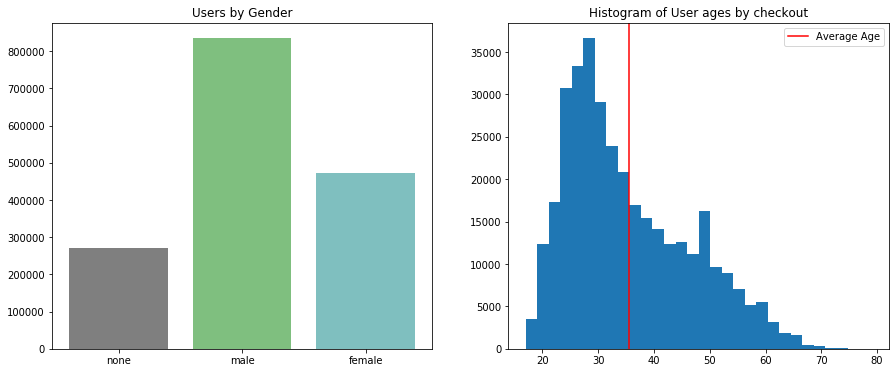

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

#First Plot: A bar plot of genders. Which gender is driving more bikes Male or Female
gender_counts = np.unique(hubway_data['gender'].replace(np.nan, 'NaN', regex = True).values, return_counts= True)
ax[0].bar(range(3), gender_counts[1], align = 'center', color=['black','green','teal'], alpha = 0.5)
ax[0].set_xticks([0,1,2])
ax[0].set_xticklabels(['none', 'male', 'female',' '])
ax[0].set_title('Users by Gender')
# A histogram of ages

ax[1].hist(year_to_age.dropna(), bins = 30)
ax[1].set_title('Histogram of User ages by checkout')
ax[1].axvline(x=np.mean(year_to_age.dropna()), color = 'red', label = 'Average Age')
ax[1].legend()
plt.show()

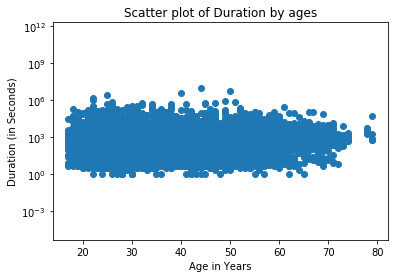

In [14]:
# Scatterplot of age with durtion
plt.yscale('log')
plt.scatter(year_to_age, hubway_data.duration+1)
plt.title('Scatter plot of Duration by ages')
plt.xlabel('Age in Years')
plt.ylabel('Duration (in Seconds)')
plt.show()

In [16]:
#Where
station_data = pd.read_csv('/Users/shreyanshrathore/Desktop/Data Science/2019-CS109A-master/Data/hubway_data/hubway_stations.csv')[['id','lat','lng']]
station_data.head()

,id,lat,lng
0,3,42.340021,-71.100812
1,4,42.345392,-71.069616
2,5,42.341814,-71.090179
3,6,42.361285,-71.065140
4,7,42.353412,-71.044624


In [20]:
hubway_data_with_gps = hubway_data.join(station_data.set_index('id'), on='strt_statn')
hubway_data_with_gps.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,lat,lng
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,42.359677,-71.059364
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,42.359677,-71.059364
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,42.359677,-71.059364
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,42.359677,-71.059364
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,42.359677,-71.059364
